<a href="https://colab.research.google.com/github/venkatasai-AI/Convolutional_AutoEncoder/blob/master/Main_conv_7441_50sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# Import Simulation dataset

In [ ]:
matrix_2d  = xr.open_dataarray("/content/drive/MyDrive/samples_200_Dummy.nc")  ## 4d array in the form of (simulation, timestates , DOF,nodes)
matrix_1d = matrix_2d.stack(z=("nodes","DoFs"))  ## 3D array in the form of (simulation , timestates, displacement)

#matrix1  = xr.open_dataarray("/content/drive/MyDrive/samples_200_Dummy.nc") 
sims_a,times, DoFs, node_ID = matrix_2d.indexes.values()

matrix_conv1d = (matrix_1d) / np.max(matrix_1d) ## normalise the dataset by dividing max value
#matrix_conv2d = (matrix_2d) / np.max(matrix_2d) ## normalise the dataset by dividing max value

### INPUT FEM PARAETERS
#inputParameter = pd.read_csv("/content/drive/MyDrive/Inputs_data_200.csv") ## input fem parameters
#input_fem =  inputParameter.iloc[:,:]

print("Simulation data: \n\n",matrix_2d)


In [ ]:
import yaml

with open(r'/content/drive/MyDrive/data.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    inputParameter =yaml.load(file)
    initial = inputParameter['initialise']
    Autoencoder_paramters = inputParameter['Autoencoder_paramters']
    #FFNN_parameter = inputParameter['FFNN_PARAMETERS']

    print(initial,Autoencoder_paramters)

In [ ]:
if Autoencoder_paramters['architecture'] == 1 : 
        conv1,conv2,conv3,conv4,conv5 = Autoencoder_paramters['convolution_layer1'],Autoencoder_paramters['convolution_layer2'],Autoencoder_paramters['convolution_layer3'],Autoencoder_paramters['convolution_layer4'],Autoencoder_paramters                                                                                ['convolution_layer5']
        print("Number of filters in each convolution layer: \n\n",conv1,conv2,conv3,conv4)


elif Autoencoder_paramters['architecture'] ==2 or 4:     
        conv1,conv2,conv3,conv4,conv5 = Autoencoder_paramters['convolution_layer1'],Autoencoder_paramters['convolution_layer2'],Autoencoder_paramters['convolution_layer3'],Autoencoder_paramters['convolution_layer4'],Autoencoder_paramters                                                                                ['convolution_layer5']
        print("Number of filters in each convolution layer: \n\n",conv1,conv2,conv3,conv4)

elif Autoencoder_paramters['architecture']==3 or 5:       
        conv1,conv2,conv3,conv4,conv5 = Autoencoder_paramters['convolution_layer1'],Autoencoder_paramters['convolution_layer2'],Autoencoder_paramters['convolution_layer3'],Autoencoder_paramters['convolution_layer4'],Autoencoder_paramters                                                                                ['convolution_layer5']
        print("Number of filters in each convolution layer: \n\n",conv1,conv2,conv3,conv4)


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from sklearn.model_selection import train_test_split

## SPLIT THE AUTOENCODER DATASET FOR TRAINIG AND TESTING

class Traintestsplit_AE:
    
    
    """
    X - Input FEM parameters
    Y1 - convolutional 1d matrix
    Y2 - convolutional 2d matrix
    model - either convolutional 1d or 2d
    Returns: train_test split for selected model

    """
    def __init__(self,inp,conv1d,conv2d,model,simulation,nodes,split_size):
        #super(Traintestsplit_AE, self).__init__()
        self.inp  = inp
        self.conv1d = conv1d
        self.conv2d = conv2d
        self.model = model
        self.simulation = simulation
        self.nodes = nodes
        self.split_size = split_size
        #self.samples = self.simulation*(1-self.split_size)
        
    def call(self):                
        if self.model == 'conv1d':                      # if model is convolutional 1d
            Y1 =self.conv1d                      ## DISPLACEMENT MATRIX FOR CONV 1D
            
                        
            X_train, X_test, Y_train, Y_test = train_test_split(self.inp,Y1,random_state=42,
                                                                 test_size=self.split_size,shuffle = True)
            
            X_train = X_train.iloc[:int((self.simulation)*(1-self.split_size)),:]
            X_test  = X_test.iloc[:int((self.simulation)*(self.split_size)),:]
            Y_train = Y_train[:int((self.simulation)*(1-self.split_size)),:,:self.nodes*3]
            Y_test  = Y_test[:int((self.simulation)*(self.split_size)),:,:self.nodes*3]
            
            return X_train,X_test,Y_train,Y_test


        elif self.model =='conv2d':                            # else model is convolutional 2d
            Y2 = self.conv2d                                   ## DISPLACEMENT MATRIX FOR CONV 2D  
            
            X_train, X_test, Y_train, Y_test = train_test_split(self.inp,Y2,random_state=42,
                                                                 test_size=0.20,shuffle = True)

            X_train = X_train.iloc[:int((self.simulation)*(1-self.split_size)),:]
            X_test  = X_test.iloc[:int((self.simulation)*(self.split_size)),:]
            Y_train  = Y_train[:int((self.simulation)*(1-self.split_size)),:,:self.nodes*3,:]
            Y_test  = Y_test[:int((self.simulation)*(self.split_size)),:,:self.nodes*3,:] 

            return X_train,X_test,Y_train,Y_test


In [ ]:
X = Traintestsplit_AE(input_fem,matrix_conv1d ,matrix_conv2d,Autoencoder_paramters['model'],
             initial['simulation'],initial['nodes'],initial['split_size'])
                                                                

X_train,X_test,Y_train,Y_test = X.call()
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape
X_train.index,X_test.index,Y_train.shape,Y_test.shape
print("X_train: \n\n",X_train.index)
print( "X_test: \n\n",X_test.index)


In [ ]:

## Plot the distribution of FE parameters from training and testing splits

for b in range(0,4):
    plt.figure()
    plt.title("Distribution of Train and Test values of param {}".format(b+1))
    plt.plot(X_train.iloc[:,b],'o', label='train sample')
    plt.plot(X_test.iloc[:,b],'og', label='test sample')
    plt.xlabel('Simulation number', fontsize = 16)
    plt.ylabel('mean distance mm', fontsize = 16)
    plt.legend(loc='best')
    plt.show()

## CONVOLUTIONAL AUTOENCODER

A typical convolutional Architecture for Dimensionality reduction

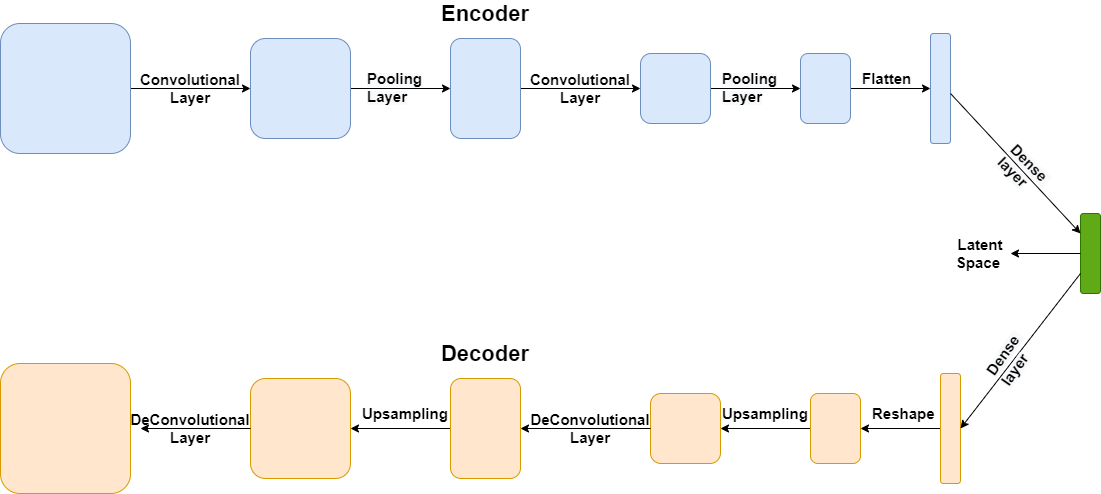

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import keras
from keras.layers import Dense, Dropout, Flatten,Reshape,UpSampling1D,Conv1DTranspose
from keras.layers import Conv1D, MaxPooling1D,AveragePooling1D,BatchNormalization



class convAutoencoder_1D(Model):
    
    """
     x - displacement matrix (High dimensional data)
     conv1,conv2,--  (number of filters in each convolutiona layers)
     Returns: latent space data (Low dimensional data)

    """
    
    def __init__(self,latent,input_matrix,conv1,conv2,conv3,conv4,conv5,architecture,kernal,activation,paddings):

        if architecture == 1:
            super(convAutoencoder_1D, self).__init__()                    

            self.paddings = paddings
            self.activation = activation
            
            self.encoder = tf.keras.Sequential([
                layers.Input(shape=(input_matrix)),
                layers.Conv1D(filters = conv1,kernel_size= kernal, activation=self.activation,padding =self.paddings),
                layers.Conv1D(filters = conv2,kernel_size= kernal, activation=self.activation,padding = self.paddings),
                layers.AveragePooling1D(2),
                layers.Conv1D(filters = conv3,kernel_size= kernal, activation=self.activation,padding = self.paddings),
                layers.Flatten(),
                layers.Dense(latent)])
        
            unflatten = self.encoder.layers[-2]
            print(unflatten.output.shape[1])
            reshape = unflatten.output.shape[1]/conv3
            
            self.decoder = tf.keras.Sequential([
                layers.Dense(unflatten.output.shape[1]),
                layers.Reshape(target_shape=(int(reshape), conv3)),
                layers.Conv1DTranspose(filters=conv2, kernel_size=kernal,padding =self.paddings,
                    activation=self.activation),
                layers.UpSampling1D(2),
                layers.Conv1DTranspose(filters=conv1, kernel_size=kernal,padding = self.paddings,activation=self.activation),
                layers.Conv1DTranspose(filters=int(input_matrix[1]), kernel_size=kernal,padding = self.paddings)])  
        

        elif architecture == 2 or 4:

            super(convAutoencoder_1D, self).__init__()                    

            self.paddings = paddings
            self.activation = activation

            self.encoder = tf.keras.Sequential([
                layers.Input(shape=(input_matrix)),
                layers.Conv1D(filters = conv1,kernel_size= kernal, activation=self.activation,padding =self.paddings),
                layers.Conv1D(filters = conv2,kernel_size= kernal, activation=self.activation,padding = self.paddings),
                layers.AveragePooling1D(2),
                layers.Conv1D(filters = conv3,kernel_size= kernal, activation=self.activation,padding = self.paddings),
                layers.AveragePooling1D(2),
                layers.Conv1D(filters = conv4,kernel_size= kernal, activation=self.activation,padding = self.paddings),   
                layers.Flatten(),
                layers.Dense(latent)])
        
            unflatten = self.encoder.layers[-2]
            print(unflatten.output.shape[1])
            reshape = unflatten.output.shape[1]/conv4
            
        
            self.decoder = tf.keras.Sequential([
                layers.Dense(int(unflatten.output.shape[1])),
                layers.Reshape(target_shape=(int(reshape), conv4)),
                layers.Conv1DTranspose(filters=conv3, kernel_size=kernal,padding = self.paddings,
                    activation=self.activation),
                layers.UpSampling1D(2),
                layers.Conv1DTranspose(filters=conv2, kernel_size=kernal,padding = self.paddings,activation=self.activation),
                layers.UpSampling1D(2),                
                layers.Conv1DTranspose(filters=conv1, kernel_size=kernal,padding = self.paddings,activation=self.activation),              
                layers.Conv1DTranspose(filters=int(input_matrix[1]), kernel_size=kernal,padding = self.paddings)])
            
            
        elif architecture == 3 or 5:
            super(convAutoencoder_1D, self).__init__()

            self.paddings = paddings
            self.kernal = kernal 
            self.activation = activation
            
            self.encoder = tf.keras.Sequential([
                layers.Input(shape=(input_matrix)),
                layers.Conv1D(filters = conv1,kernel_size= kernal, activation=self.activation,padding = self.paddings),
                layers.AveragePooling1D(2),
                layers.Conv1D(filters = conv2,kernel_size= kernal, activation=self.activation,padding = self.paddings),
                layers.AveragePooling1D(2),
                layers.Conv1D(filters = conv3,kernel_size= kernal, activation=self.activation,padding = self.paddings),
                layers.AveragePooling1D(2),
                layers.Conv1D(filters = conv4,kernel_size= kernal, activation=self.activation,padding = "same"),
                layers.AveragePooling1D(2),
                layers.Conv1D(filters = conv5,kernel_size= kernal, activation=self.activation,padding = "same"),                
                layers.Flatten(),
                layers.Dense(latent)])
        
            unflatten = self.encoder.layers[-2]
            print(unflatten.output.shape[1])
            reshape = unflatten.output.shape[1]/conv5
            
            self.decoder = tf.keras.Sequential([
                layers.Dense(unflatten.output.shape[1]),
                layers.Reshape(target_shape=(int(reshape), conv5)),
                layers.Conv1DTranspose(filters=conv4, kernel_size=kernal,padding = "same",
                    activation=self.activation),
                layers.UpSampling1D(2),
                layers.Conv1DTranspose(filters=conv3, kernel_size=kernal,padding ="same",activation=self.activation),
                layers.UpSampling1D(2),
                layers.Conv1DTranspose(filters=conv2, kernel_size=kernal,padding = self.paddings,activation=self.activation),
                layers.UpSampling1D(2),
                layers.Conv1DTranspose(filters=conv1, kernel_size=kernal,padding = self.paddings,activation=self.activation),
                layers.UpSampling1D(2),
                layers.Conv1DTranspose(filters=int(input_matrix[1]), kernel_size=kernal,padding = self.paddings)])    




            
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


### Compile the architecture and train the Autoencoder model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. we want to minimize this function to "steer" the model in the right direction.
* *Optimizer* — converge to minimum.
* *Metrics* —Used to monitor the training and testing steps. The following network uses *accuracy*.

In [ ]:
if Autoencoder_paramters['model'] == 'conv1d':
    model_CAE = convAutoencoder_1D(Autoencoder_paramters['latent'],input_matrix_1D,conv1,conv2,conv3,conv4,conv5,                                
                                    Autoencoder_paramters['architecture'],Autoencoder_paramters['kernal'],Autoencoder_paramters['activation'],Autoencoder_paramters['padding'])                                                                                        

                                   
elif Autoencoder_paramters['model'] == 'conv2d':
    model_CAE = convAutoencoder_2D(Autoencoder_paramters['latent'],input_matrix_2D,conv1,conv2,conv3,conv4,conv5,
                                                Autoencoder_paramters['architecture'],Autoencoder_paramters['kernal'],Autoencoder_paramters['activation'])
                                    
                                   
else:
    raise ValueError('Unrecognized model')

print(model_CAE.encoder.summary())

## Train the convolutional Autoencoder

In [ ]:
import timeit
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, losses
import keras
from keras.callbacks import ModelCheckpoint
from datetime import datetime

start_time = timeit.default_timer()

# Load the TensorBoard notebook extension.


opt = tf.keras.optimizers.Adam(learning_rate=Autoencoder_paramters['lr'])
model_CAE.compile(optimizer=opt, loss=losses.MeanSquaredError(),metrics=['accuracy'])



#fit the model
history = model_CAE.fit(np.array(Y_train),np.array(Y_train),Autoencoder_paramters['batchsize'],epochs =Autoencoder_paramters['epoch'], 
                                                verbose=0)
                                  

#model.summary()
elapsed = timeit.default_timer() - start_time

# Print the time taken to train and the final result on the test set
print("Time (s): ", elapsed)

In [ ]:
print(model_CAE.decoder.summary())

## SAVE THE TRAINED AUTOENCODER MODEL

In [ ]:
#!mkdir -p Best_model_1000
model_CAE.save('/content/drive/MyDrive/COLLAB_WORKS_7441-1500/LATENT_VARIATION_7441NODES/model1_LT{}_nds{}_batch{}_sim{}_conv1{}_epoch{}'.format(Autoencoder_paramters['latent'],
    initial['nodes'],Autoencoder_paramters['batchsize'],initial['simulation'],conv1,Autoencoder_paramters['epoch']))



```
# This is formatted as code
```

## Loss Plot - mse

In [ ]:
losses = history.history['loss']
#val_losses = history.history['val_loss']
accuracy = history.history['accuracy']
#round = 42
epochs = (range(Autoencoder_paramters['epoch']))
plt.figure()
plt.plot(epochs, losses, '-', label='Training loss')
#plt.plot(epochs, val_losses, '-', label='val_losses')
plt.title('Training loss')
plt.xlabel('epochs',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.legend(loc='upper right',fontsize=10)
print(losses[-1])
#plt.savefig('Training Loss.pdf')

# Decode back to original matrix using Convolutional Decoder

In [ ]:
## predict the test data and then decode 
latent_test = model_CAE.encoder.predict(Y_test) ## feed test data to autoenocder
latent_train = model_CAE.encoder.predict(Y_train) ## from original data to encoded

decoded = model_CAE.decoder.predict(latent_train)
decoded = decoded * (np.max(matrix_1d).values)

In [ ]:
## convert matrix 3d to 4d for plots


decoded_4d = np.array(decoded).reshape(decoded.shape[0],
                              decoded.shape[1],initial['nodes'],3) 


In [ ]:
sims, states, DoFs, nodes = matrix_2d.indexes.values()
train_idx = np.array(X_train.index)
node_idx = np.array(nodes[0:initial['nodes']])


decoded_predict = xr.DataArray(decoded_4d, dims = ["t_sims","t_states","Nds","DoFs"],
                         coords = {"t_sims":train_idx,                              
                                   "Nds": node_idx,
                                   "DoFs": DoFs})
print("Trainindex: \n\n",train_idx)


In [ ]:
plt.figure()

Nnodeno = 1001983
sim_index = train_idx[-1]

plt.plot(states, matrix_2d.sel(sims = sim_index , nodes = Nnodeno, DoFs = 'x_disp'),'b',label='x-disp-true')
plt.plot(states, decoded_predict.sel(t_sims = train_idx[-1], Nds = Nnodeno, DoFs = 'x_disp'),'--b',label='x-disp-decoded')

plt.plot(states, matrix_2d.sel(sims = sim_index, nodes = Nnodeno, DoFs = 'y_disp'),'r',label='y-disp-true')
plt.plot(states, decoded_predict.sel(t_sims = train_idx[-1], Nds = Nnodeno, DoFs = 'y_disp'),'--r',label='y-disp-decoded')

plt.plot(states, matrix_2d.sel(sims = sim_index, nodes = Nnodeno, DoFs = 'z_disp'),'g',label='z-disp-true')
plt.plot(states, decoded_predict.sel(t_sims = train_idx[-1], Nds = Nnodeno, DoFs = 'z_disp'),'--g',label='z-disp-decoded')

plt.xlabel('Time ms', fontsize = 16)
plt.ylabel('Displacement mm', fontsize = 16)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=3)


## Mean distance error

In [ ]:
mean_dist_nds_test = []
for j in range(0,X_train.shape[0]):
    dist_nds = []
    pred = np.array(decoded_predict[j,:,:]).reshape(len(times),3,initial['nodes'])
    true = np.array(Y_train[j,:,:]).reshape(len(times),3,initial['nodes'])
    for k in range(initial['nodes']):
        squared_dist = np.sum((true[:,:,k]-pred[:,:,k])**2, axis=1)
        dist = np.sqrt(squared_dist)
        dist_nds.append(dist)

    mean_dist_nds = np.array(dist_nds).mean(axis = 0)
    mean_dist_nds_test.append(mean_dist_nds)


In [ ]:
## Error Across every time step

mean_dist_mean = np.array(mean_dist_nds_test).mean(axis=0)
mean_dist_std = np.array(mean_dist_nds_test).std(axis=0)

plt.figure()
plt.title("Mean and standard deviation")
plt.xlabel('Time ms', fontsize = 16)
plt.ylabel('mean distance mm', fontsize = 16)
plt.plot(times,mean_dist_mean,'o-', color = "b", label= "mean of mean distance")
plt.fill_between(times, mean_dist_mean-mean_dist_std, mean_dist_mean+mean_dist_std)
plt.legend(loc='upper left')
!mkdir -p euclidean_error


In [ ]:
## Mean absolute error

from sklearn.metrics import mean_absolute_error
mae = []
for j in range(0,X_train.shape[0]):
    MAE =  mean_absolute_error(decoded[j,:,:], (np.max(matrix_1d).values)*Y_train[j,:,:])
    mae.append(MAE)
print(mae)

